In [1]:
import pandas as pd
# df = pd.read_csv('EURUSD.csv')
df = pd.read_csv('EURUSD.csv', delimiter='\t')
df.columns = [col.replace('<', '').replace('>', '') for col in df.columns]
df

,DATE,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD
0,2021.08.02,1.18641,1.18969,1.18590,1.18688,47011,0,0
1,2021.08.03,1.18670,1.18933,1.18537,1.18637,49688,0,0
2,2021.08.04,1.18631,1.18997,1.18328,1.18367,48391,0,0
3,2021.08.05,1.18360,1.18572,1.18282,1.18327,47001,0,0
4,2021.08.06,1.18324,1.18357,1.17544,1.17611,47467,0,0
...,...,...,...,...,...,...,...,...
861,2024.11.20,1.05898,1.06097,1.05068,1.05431,38714,0,0
862,2024.11.21,1.05431,1.05548,1.04621,1.04734,42696,0,0
863,2024.11.22,1.04732,1.04979,1.03313,1.04178,48855,0,0
864,2024.11.25,1.04799,1.05300,1.04490,1.04928,49321,0,0


<Axes: >

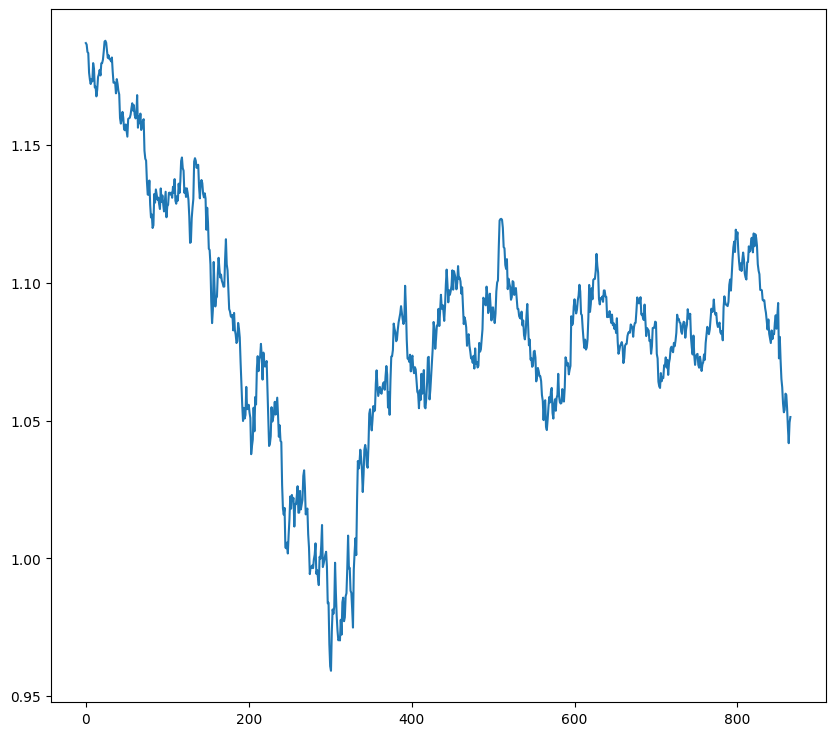

In [2]:
df['CLOSE'].plot(figsize=(10, 9))

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
x_data = df['CLOSE'].values

def get_train_test(split_percent, data):
    n = len(data)
    split = int(n * split_percent)
    train_data = data[:split]
    test_data = data[split:]
    return train_data, test_data
split_percent = 0.8     ## 80% of data for train data and 20% of data for test
train_data, test_data = get_train_test(split_percent, x_data)
print(len(train_data))

def gen_seq(data,timesteps):
  x, y = [], []
  for i in range(len(data)-timesteps):
    x.append(data[i:i+timesteps])
    y.append(data[i+timesteps])
  return np.array(x), np.array(y)
time_steps = 7 
trainX, trainY = gen_seq(train_data, time_steps)
testX, testY = gen_seq(test_data, time_steps)

scaler = MinMaxScaler(feature_range=(0,1))
x_train_scar = scaler.fit_transform(trainX.reshape(-1,1))
trainX = x_train_scar.reshape(trainX.shape[0],trainX.shape[1],1)
print(x_train_scar)

x_test_scar = scaler.transform(testX.reshape(-1,1))
testX = x_test_scar.reshape(testX.shape[0],testX.shape[1],1)


692
[[0.99632353]
 [0.99409139]
 [0.98227416]
 ...
 [0.53125   ]
 [0.54407388]
 [0.54219188]]


In [4]:
print(trainX.shape, trainY.shape)
print(trainX)

(685, 7, 1) (685,)
[[[0.99632353]
  [0.99409139]
  [0.98227416]
  ...
  [0.94918592]
  [0.93828782]
  [0.93132878]]

 [[0.99409139]
  [0.98227416]
  [0.98052346]
  ...
  [0.93828782]
  [0.93132878]
  [0.93942577]]

 [[0.98227416]
  [0.98052346]
  [0.94918592]
  ...
  [0.93132878]
  [0.93942577]
  [0.93539916]]

 ...

 [[0.56551996]
  [0.56670168]
  [0.56039916]
  ...
  [0.58127626]
  [0.55462185]
  [0.53125   ]]

 [[0.56670168]
  [0.56039916]
  [0.55676646]
  ...
  [0.55462185]
  [0.53125   ]
  [0.54407388]]

 [[0.56039916]
  [0.55676646]
  [0.58127626]
  ...
  [0.53125   ]
  [0.54407388]
  [0.54219188]]]


In [5]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense
from tensorflow.keras.models import Sequential
model = Sequential([
    Input(shape = (time_steps, 1)),        
    SimpleRNN(10, activation='tanh'),       
    Dense(1, activation = 'linear')        
    ])

model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')
hist = model.fit(trainX, trainY, epochs=10, batch_size=1)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
685/685 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.1112
Epoch 2/10
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0022
Epoch 3/10
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.9716e-04
Epoch 4/10
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.8638e-04
Epoch 5/10
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.8073e-04
Epoch 6/10
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.2511e-04
Epoch 7/10
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9.7241e-05
Epoch 8/10
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.1949e-04
Epoch 9/10
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.1933e-04
Epoch 10/10
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9.3486e-05
